In [19]:
%matplotlib inline

import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' # plt绘图报错（不显示图的问题）
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from PIL import Image

# 特征工程
## 特征分析
### 盒型图(boxplot)
- 下四分位数(Q1)，中位数(median)，上四分位数(Q3)
- 上四分位数到最大值之间建立一条延伸线，这个延伸线成为“胡须(whisker)”
- IQR = Q3-Q1，即上四分位数与下四分位数之间的差，也就是盒子的长度。
- 最小观测值为min = Q1 - 1.5*IQR，如果存在离群点小于最小观测值，则胡须下限为最小观测值，离群点单独以点汇出。如果没有比最小观测值小的数，则胡须下限为最小值。
- 最大观测值为max = Q3 -1.5*IQR，如果存在离群点大于最大观测值，则胡须上限为最大观测值，离群点单独以点汇出。如果没有比最大观测值大的数，则胡须上限为最大值。

[matplotlib API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
```
上限值：Q1-1.5×IQR
上相邻值：距离上限值最近的值
须线：上下分位数各自与上下相邻值的距离
上四分位数（Q1)：一组数据按顺序排列，从小至大第25%位置的数值
中位数：一组数据按顺序排列，从小至大第50%位置的数值
中位线（IQR）：Q3-Q1上四分位数至下四分位数的距离
下四分位数（Q3）：一组数据按顺序排列，从小至大第75%位置的数值
下相邻值：距离下限值最近的值
下限值：Q3+1.5×IQR
离群值（异常值）：一组数据中超过上下限的真实值
```


### 小提琴图violinplot
[seaborn API](http://seaborn.pydata.org/generated/seaborn.violinplot.html)

### 平行坐标图Parallel Coordinates
[plotly doc](https://plotly.com/python/parallel-coordinates-plot/)
[plotly API](https://plotly.com/python-api-reference/generated/plotly.express.parallel_coordinates.html)
[Parallel Coordinate(以下简称PC)](https://en.jinzhao.wiki/wiki/Parallel_coordinates) 一种用来呈现多变量，或者高纬度数据的可视化技术, 用它可以很好的呈现多个变量之间的关系(strength of parallel coordinate is in Modeling relations).
PC 在1898年的时候，就有人用这样的一种技术呈现信息，但是它是在1977年Inselberg 在的他一篇论文multidimensional detective里面,用PC对几组数据进行详细的分析之后才有更多人关注。
有些人也称呼这类技术为可视化数据挖掘(Visual Data mining).

图种每个竖线代表一个特征，上面的点代表该特征的值，每个样本表示出来就是一个贯穿所有竖线的折线图。

- Reading(解读), 如果两个变量之间的线是交叉的呈现X型(如上图的x 和 -x， -x 和 x^)那么两个变量之间是负相关。
- 如果两个变量之间的线是相互平行的(如上图的x^和 ax, ax 和 x +b)，那么相互之间的关系是正相关.
- 变量之间的线是随机交叉的(random 和 x),那么两者之间没有特别的关系。

### pairplot函数可视化数据特征间的关系,探索
[seaborn API](http://seaborn.pydata.org/generated/seaborn.pairplot.html)
### Andrews Curves
使用 Andrews Curves 将每个多变量观测值转换为曲线并表示傅立叶级数的系数，这对于检测时间序列数据中的异常值很有用。

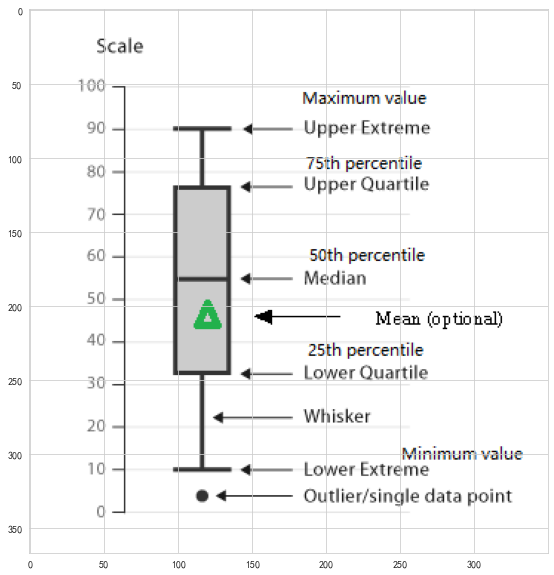

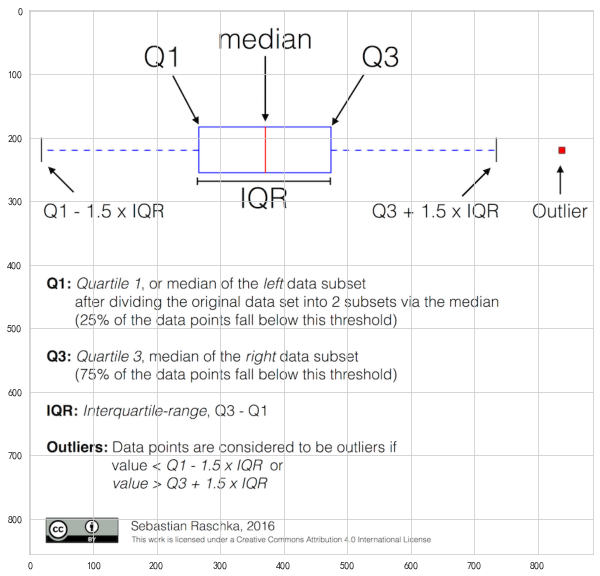

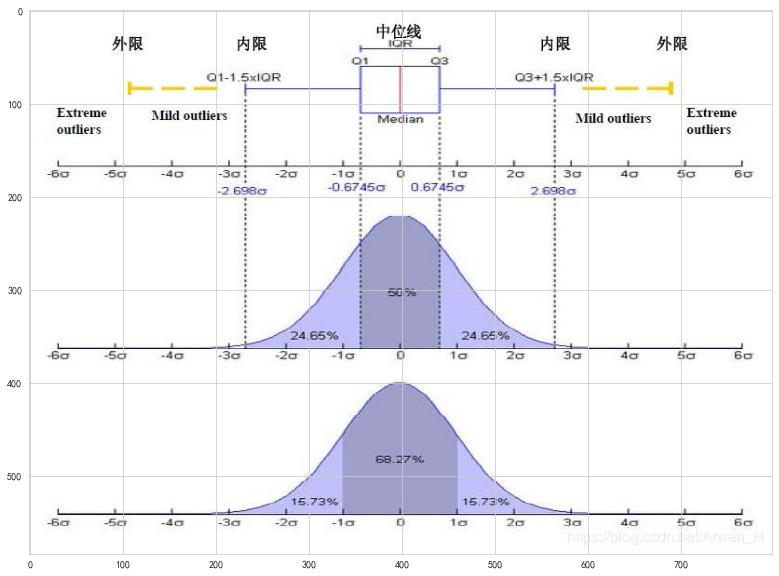

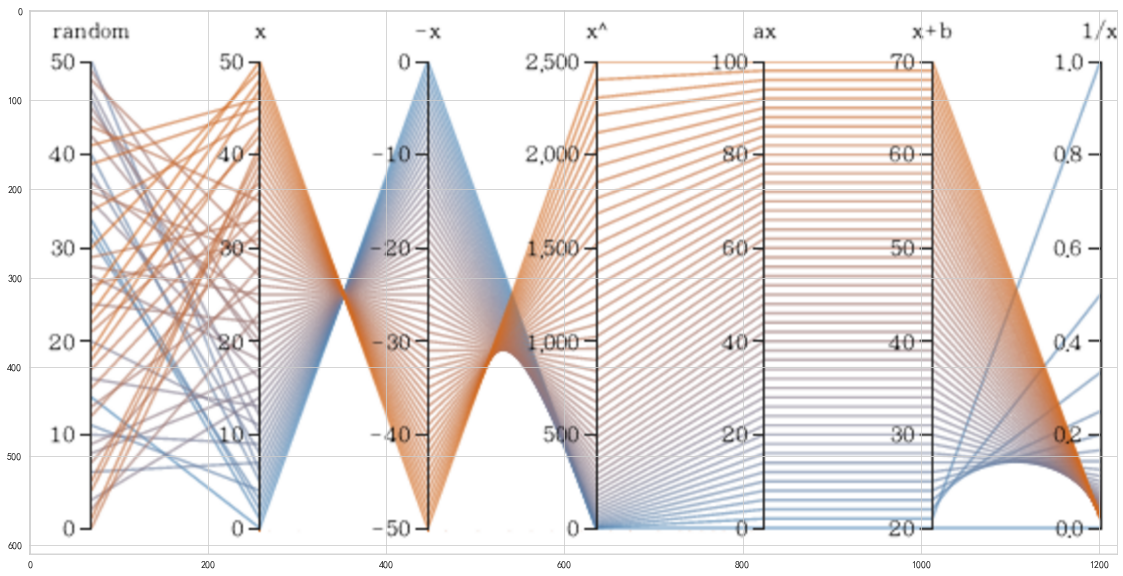

In [20]:
img = Image.open("./img/box_plot.png")
plt.figure(figsize=(20,10)) #设置窗口大小
plt.imshow(img)

img = Image.open("./img/boxplot_explanation.webp")
plt.figure(figsize=(20,10)) #设置窗口大小
plt.imshow(img)

img = Image.open("./img/boxplot_norm.jpg")
plt.figure(figsize=(20,10)) #设置窗口大小
plt.imshow(img)

img = Image.open("./img/Parallel_Coordinate.png")
plt.figure(figsize=(20,10)) #设置窗口大小
plt.imshow(img)

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

import pandas as pd
# 先把数据提取出来
data = iris['data']
# 处理类标签数据
target= iris['target']
target_names = iris['target_names']
target_labels=[]
for class_num in target:
    target_labels.append(target_names[class_num])
feature_names = iris['feature_names']
# 合成字典
data_dict = {}
column = 0
for feature_name in feature_names:
    data_dict[feature_name] = data[:,column]
    column+=1
data_dict['target_labels'] = target_labels

iris_pd_data = pd.DataFrame(data_dict)

{'whiskers': [<matplotlib.lines.Line2D at 0x22a9123ae20>,
 'caps': [<matplotlib.lines.Line2D at 0x22a9124b580>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a9123aa90>,
 'medians': [<matplotlib.lines.Line2D at 0x22a9124bca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x22a91256400>,
 'means': [<matplotlib.lines.Line2D at 0x22a91256070>,
  <matplotlib.lines.Line2D at 0x22a9128b730>]}

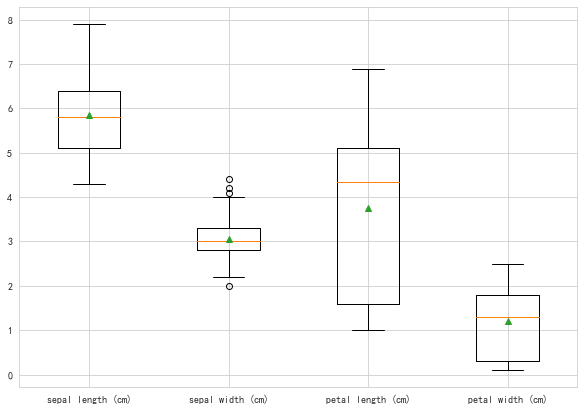

In [22]:
plt.figure(figsize=(10,7)) #设置窗口大小
plt.boxplot(iris.data,labels = iris.feature_names,showmeans = True)


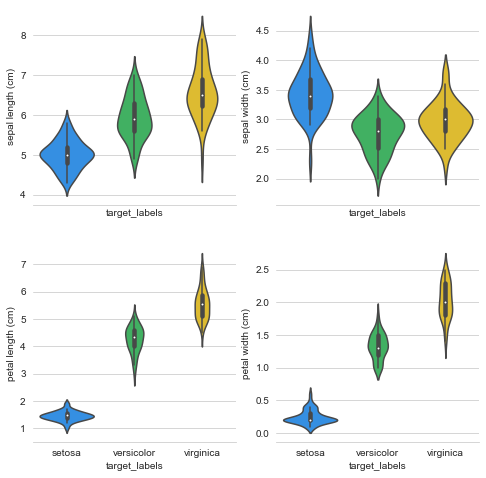

In [23]:
# seaborn高封装
import seaborn as sns
sns.set_style("whitegrid")

# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']
# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.violinplot(x='target_labels', y='sepal length (cm)', data=iris_pd_data, palette=antV, ax=axes[0, 0])
sns.violinplot(x='target_labels', y='sepal width (cm)', data=iris_pd_data, palette=antV, ax=axes[0, 1])
sns.violinplot(x='target_labels', y='petal length (cm)', data=iris_pd_data, palette=antV, ax=axes[1, 0])
sns.violinplot(x='target_labels', y='petal width (cm)', data=iris_pd_data, palette=antV, ax=axes[1, 1])

plt.show()

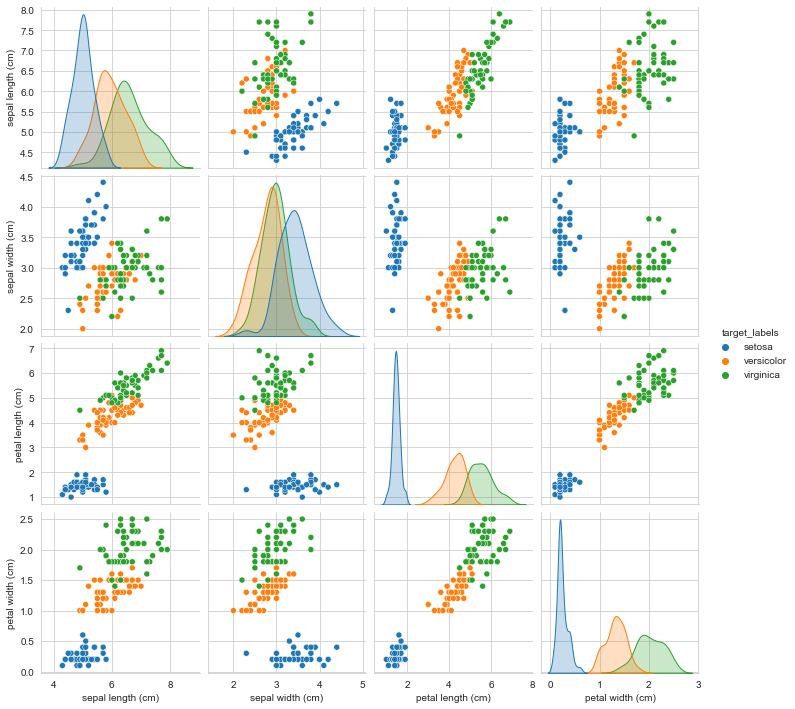

In [30]:
"""
df = sns.load_dataset('iris')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

sns.pairplot(df)
"""

# 生成各特征之间关系的矩阵图：
g = sns.pairplot(data=iris_pd_data, hue= 'target_labels')

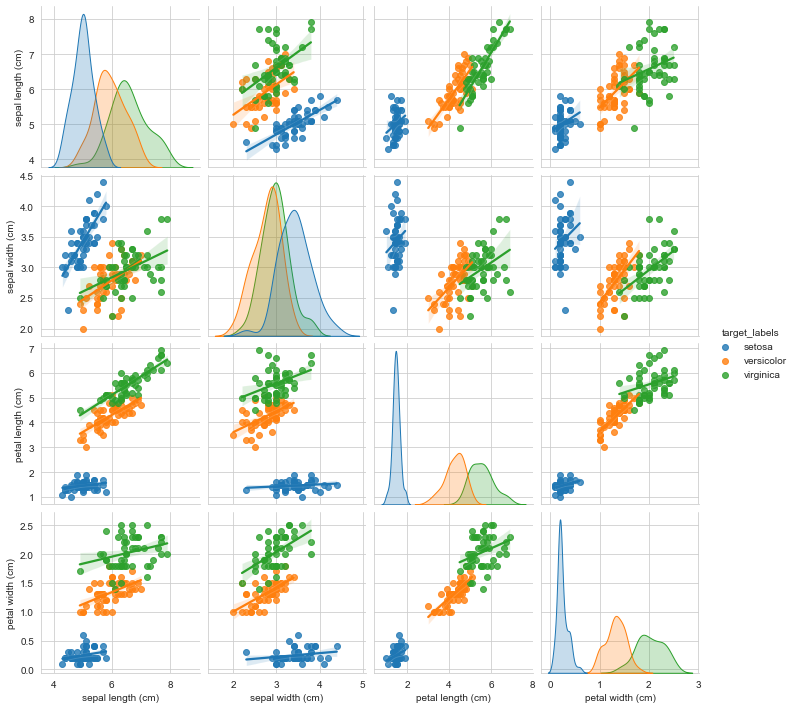

In [33]:
# , kind="scatter"
# , diag_kind="kde"
# , diag_kind="hist"
sns.pairplot(data=iris_pd_data, hue= 'target_labels', kind="reg")

<ipython-input-24-b317a27b29dc>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_yticklabels(labels)
<ipython-input-24-b317a27b29dc>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_yticklabels(labels)


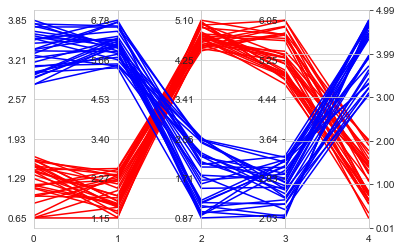

In [24]:
import matplotlib.ticker as ticker

def parallel_coordinates(data_sets, style=None):

    dims = len(data_sets[0])
    x    = range(dims)
    fig, axes = plt.subplots(1, dims-1, sharey=False)

    if style is None:
        style = ['r-']*len(data_sets)

    # Calculate the limits on the data
    min_max_range = list()
    for m in zip(*data_sets):
        mn = min(m)
        mx = max(m)
        if mn == mx:
            mn -= 0.5
            mx = mn + 1.
        r  = float(mx - mn)
        min_max_range.append((mn, mx, r))

    # Normalize the data sets
    norm_data_sets = list()
    for ds in data_sets:
        nds = [(value - min_max_range[dimension][0]) /
                min_max_range[dimension][2]
                for dimension,value in enumerate(ds)]
        norm_data_sets.append(nds)
    data_sets = norm_data_sets

    # Plot the datasets on all the subplots
    for i, ax in enumerate(axes):
        for dsi, d in enumerate(data_sets):
            ax.plot(x, d, style[dsi])
        ax.set_xlim([x[i], x[i+1]])

    # Set the x axis ticks
    for dimension, (axx,xx) in enumerate(zip(axes, x[:-1])):
        axx.xaxis.set_major_locator(ticker.FixedLocator([xx]))
        ticks = len(axx.get_yticklabels())
        labels = list()
        step = min_max_range[dimension][2] / (ticks - 1)
        mn   = min_max_range[dimension][0]
        for i in range(ticks):
            v = mn + i*step
            labels.append('%4.2f' % v)
        axx.set_yticklabels(labels)


    # Move the final axis' ticks to the right-hand side
    axx = plt.twinx(axes[-1])
    dimension += 1
    axx.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    ticks = len(axx.get_yticklabels())
    step = min_max_range[dimension][2] / (ticks - 1)
    mn   = min_max_range[dimension][0]
    labels = ['%4.2f' % (mn + i*step) for i in range(ticks)]
    axx.set_yticklabels(labels)

    # Stack the subplots
    plt.subplots_adjust(wspace=0)

    return plt

def demo_pc():
    import random
    base  = [0,   0,  5,   5,  0]
    scale = [1.5, 2., 1.0, 2., 2.]
    data = [[base[x] + random.uniform(0., 1.)*scale[x]
            for x in range(5)] for y in range(30)]
    colors = ['r'] * 30

    base  = [3,   6,  0,   1,  3]
    scale = [1.5, 2., 2.5, 2., 2.]
    data.extend([[base[x] + random.uniform(0., 1.)*scale[x]
                 for x in range(5)] for y in range(30)])
    colors.extend(['b'] * 30)

    parallel_coordinates(data, style=colors)

demo_pc()

<ipython-input-24-b317a27b29dc>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_yticklabels(labels)
<ipython-input-24-b317a27b29dc>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_yticklabels(labels)


<module 'matplotlib.pyplot' from 'c:\\program files\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

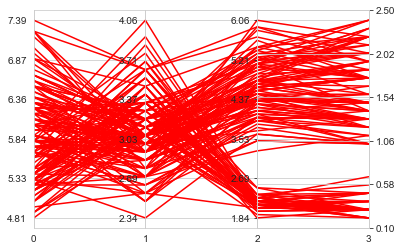

In [25]:
parallel_coordinates(iris.data)

<AxesSubplot:>

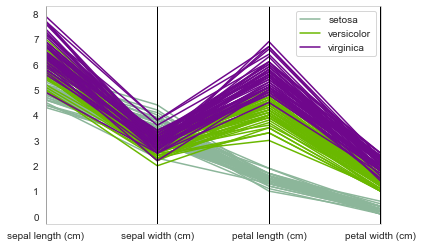

In [26]:
#from pandas.plotting import parallel_coordinates
import pandas.plotting

pandas.plotting.parallel_coordinates(iris_pd_data, 'target_labels')
# plt.show()

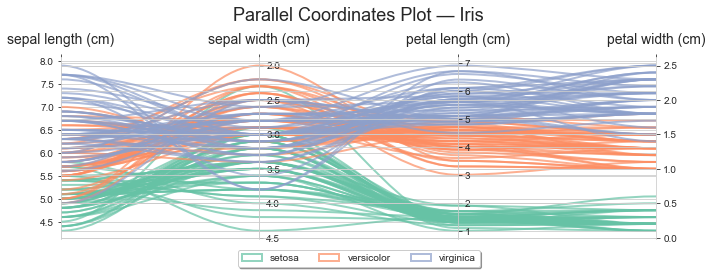

In [27]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
ynames = iris.feature_names
ys = iris.data
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05

ymaxs[1], ymins[1] = ymins[1], ymaxs[1]  # reverse axis 1 to have less crossings
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

fig, host = plt.subplots(figsize=(10,4))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot — Iris', fontsize=18, pad=12)

colors = plt.cm.Set2.colors
legend_handles = [None for _ in iris.target_names]
for j in range(ys.shape[0]):
    # create bezier curves
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=2, alpha=0.7, edgecolor=colors[iris.target[j]])
    legend_handles[iris.target[j]] = patch
    host.add_patch(patch)
host.legend(legend_handles, iris.target_names,
            loc='lower center', bbox_to_anchor=(0.5, -0.18),
            ncol=len(iris.target_names), fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [28]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

<AxesSubplot:>

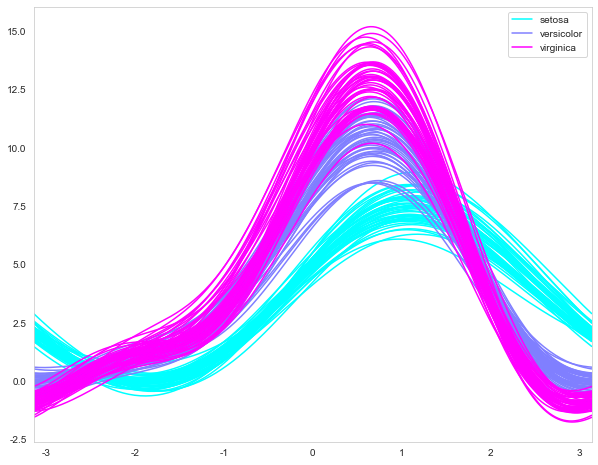

In [31]:
from pandas import plotting
plt.subplots(figsize = (10,8))
plotting.andrews_curves(iris_pd_data, 'target_labels', colormap='cool')
# plt.show()

<AxesSubplot:>

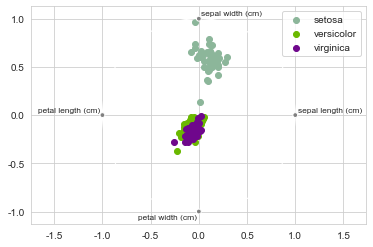

In [32]:
from pandas.plotting import radviz
radviz(iris_pd_data, "target_labels")